# Diabetes Prediction Using Machine Learning

## Project Statement
Diabetes is a chronic disease that requires continuous medical care to prevent complications. Hospital readmissions of diabetic patients place a significant burden on healthcare systems, increasing costs and patient risks. This project aims to predict diabetes-related hospital readmission using the Diabetes 130-US Hospitals dataset. By applying machine learning algorithms, we will identify key factors influencing readmission rates and develop a predictive model to assist healthcare providers in proactive decision-making.

## Problem Statement
Diabetes is a chronic disease affecting millions of people worldwide, leading to serious complications if not managed properly. One of the critical challenges in diabetes care is the high rate of hospital readmissions, which puts financial strain on healthcare systems and increases the risk of complications for patients.
The Diabetes 130-US Hospitals dataset contains medical records of diabetic patients from 130 hospitals, providing valuable insights into factors influencing hospital readmissions. However, identifying which patients are at risk of early readmission (<30 days) is a complex task due to the large number of variables involved, including demographics, lab test results, medication history, and prior hospital visits.
This project aims to build a machine learning model that can predict hospital readmission for diabetic patients based on their medical history and treatment patterns. By leveraging data preprocessing, feature selection, and various classification algorithms, we aim to improve hospital decision-making, reduce readmission rates, and enhance patient care.

### Data Exploration
#### Importing Libraries

In [1]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib

#### Loading Dataset

In [2]:
data = pd.read_csv("diabetic_data.csv")
print("\t")
print("Diabetes Prediction")
print("\t")
data

	
Diabetes Prediction
	


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


#### Understand the Data Structure

In [3]:
# Check the number of rows and columns
print("\t")
print(f"The shape of the dataset is {data.shape}")

	
The shape of the dataset is (101766, 50)


In [4]:
# Display column names
print("\t")
print("Column names are:")
print("\t")
data.columns

	
Column names are:
	


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
# Check data types
print("\t")
print("Each column's data types are:")
print("\t")
data.dtypes

	
Each column's data types are:
	


encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [6]:
# Get concise information about the dataset
print("\t")
print("Dataset Information:")
print("\t")
data.info()

	
Dataset Information:
	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 n

In [7]:
# Summary statistics
print("\t")
print("Summary Statistics:")
print("\t")
data.describe()

	
Summary Statistics:
	


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
# Checking unique values in categorical columns
print("\t")
print("Unique Values in Categorical columns:")
print("\t")
data.nunique()

	
Unique Values in Categorical columns:
	


encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

#### Handling Missing Values

In [9]:
# Check for missing values
print("\t")
print("Total number of missing values:")
print("\t")
data.isnull().sum()

	
Total number of missing values:
	


encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [10]:
data = data.dropna()

In [11]:
print("\t")
print(f"nAfter removing missing values:")
print(data.isnull().sum())  

	
nAfter removing missing values:
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbut

#### Check for Duplicate Values

In [12]:
# Check for duplicate rows
print("\t")
print(f"Total number of duplicate values is {data.duplicated().sum()}")

	
Total number of duplicate values is 0


### EXPLORATIVE DATA ANALYSIS
#### Univariate Analysis

#### Pie chart to represent diabetes cases in the dataset

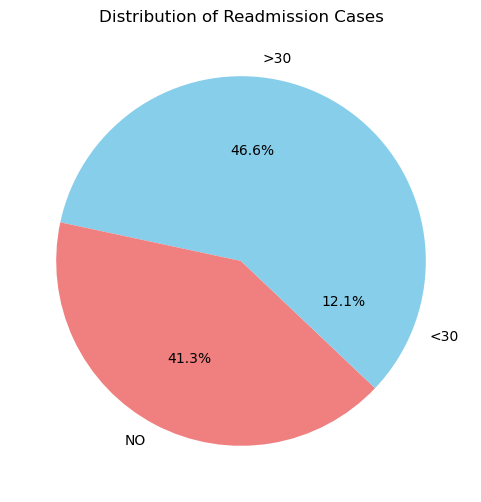

In [13]:
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'readmit' column
readmit_counts = data['readmitted'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(readmit_counts, labels=readmit_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Distribution of Readmission Cases")
plt.show()

#### Column charts to determine number of respondants across different features.

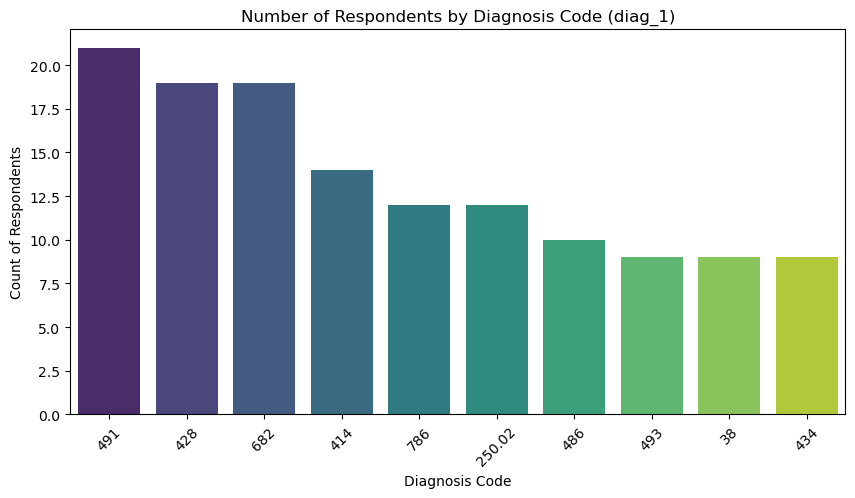

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['diag_1'], order=data['diag_1'].value_counts().index[:10], palette='viridis')

plt.title("Number of Respondents by Diagnosis Code (diag_1)")
plt.xlabel("Diagnosis Code")
plt.ylabel("Count of Respondents")
plt.xticks(rotation=45)
plt.show()

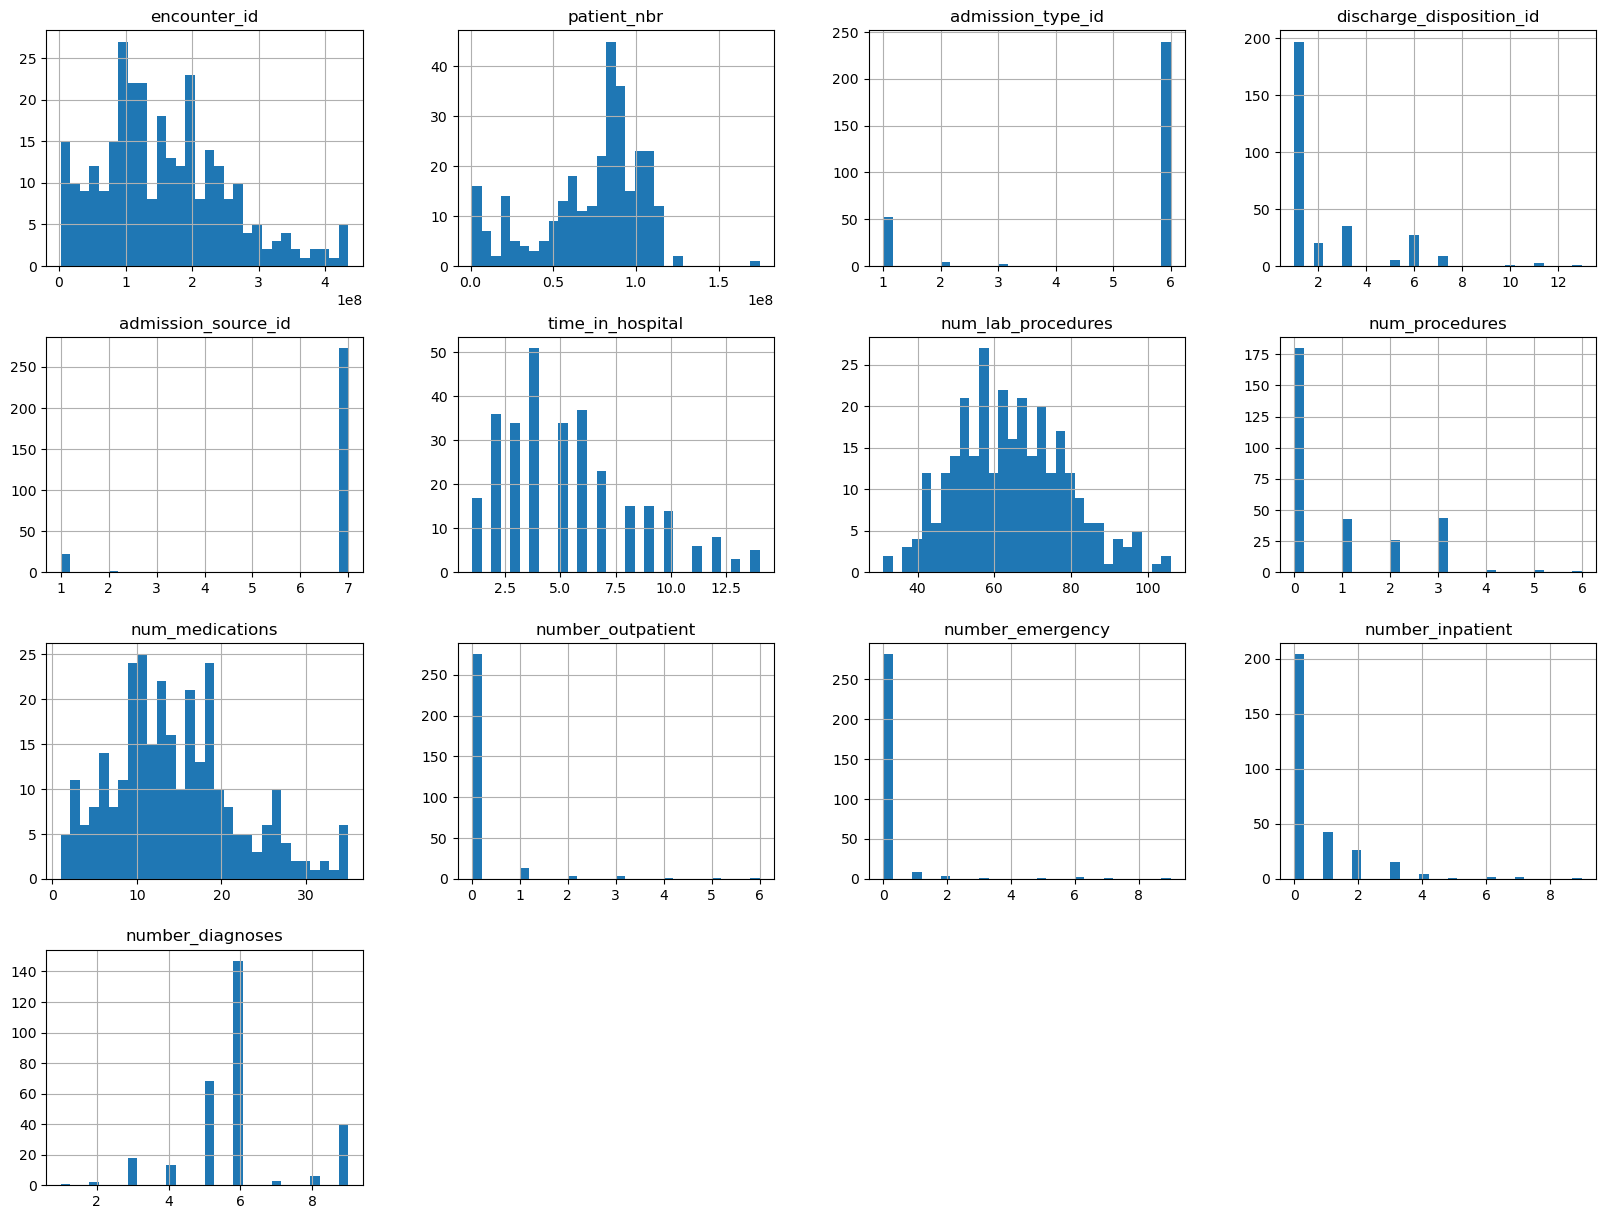

In [15]:
data.hist(figsize=(20, 15), bins=30)
plt.show()

#### Boxplot to check outliers in each feature.

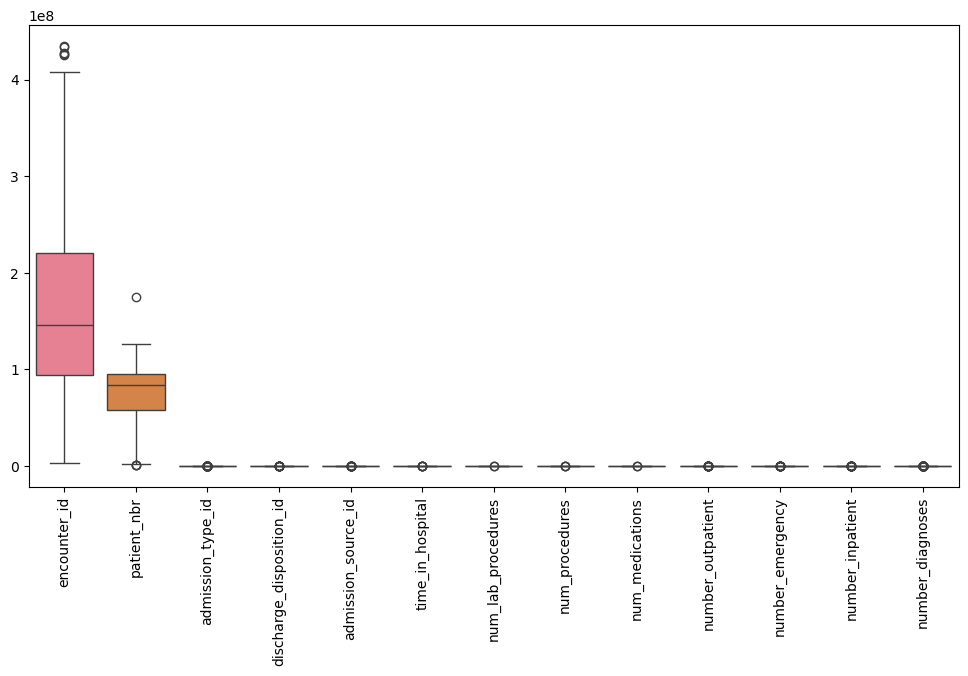

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

#### Convert Categorical Features to Numeric Before Correlation Analysis

In [17]:
# Convert categorical variables to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

cat_columns = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in cat_columns:
    data[col] = encoder.fit_transform(data[col])

print("Categorical features encoded successfully.")

Categorical features encoded successfully.


#### Bivariate Analysis
#### Correlation Heatmap

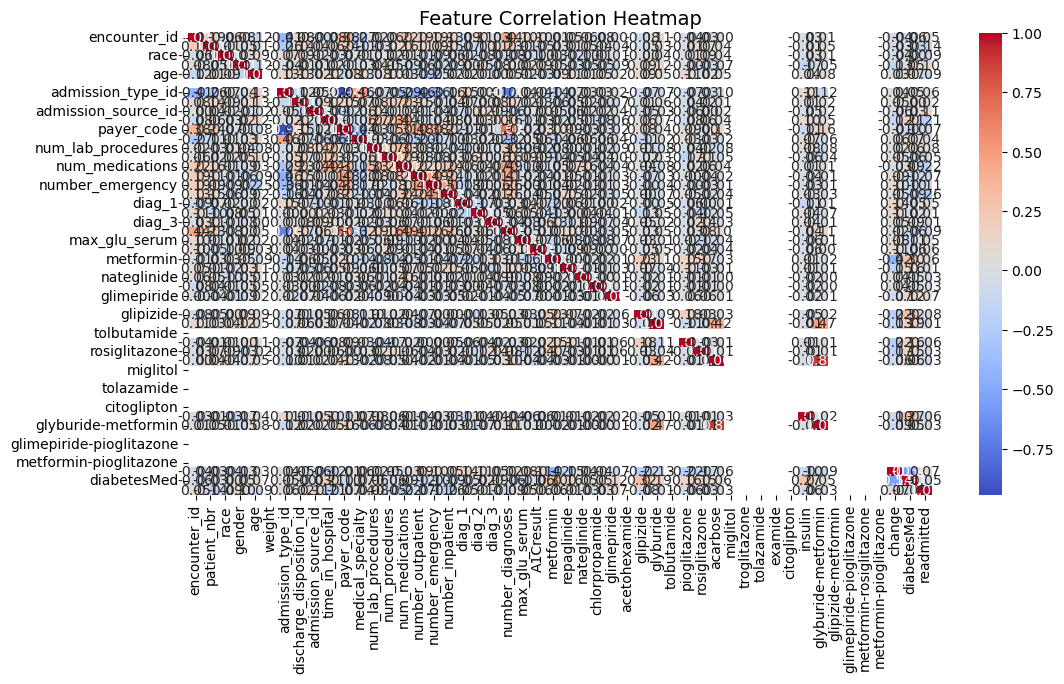

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

#### Readmission Status by Gender

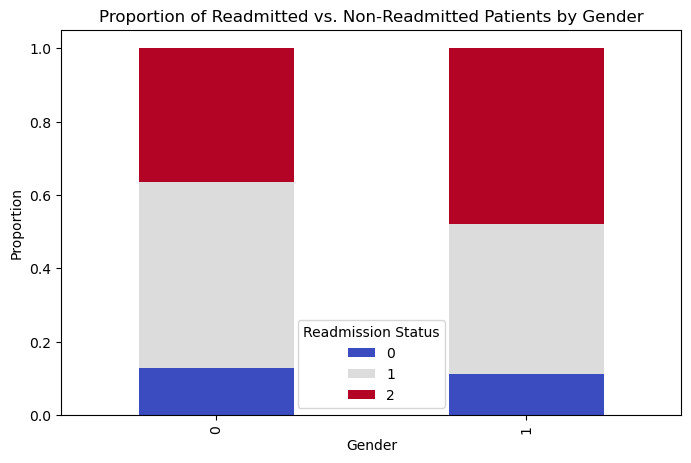

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a crosstab (pivot table)
ct = pd.crosstab(data['gender'], data['readmitted'], normalize='index')

# Plot stacked bar chart
ct.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8,5))

plt.title("Proportion of Readmitted vs. Non-Readmitted Patients by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Readmission Status")
plt.show()

#### Age Distribution of Readmitted vs Non-Readmitted Patients

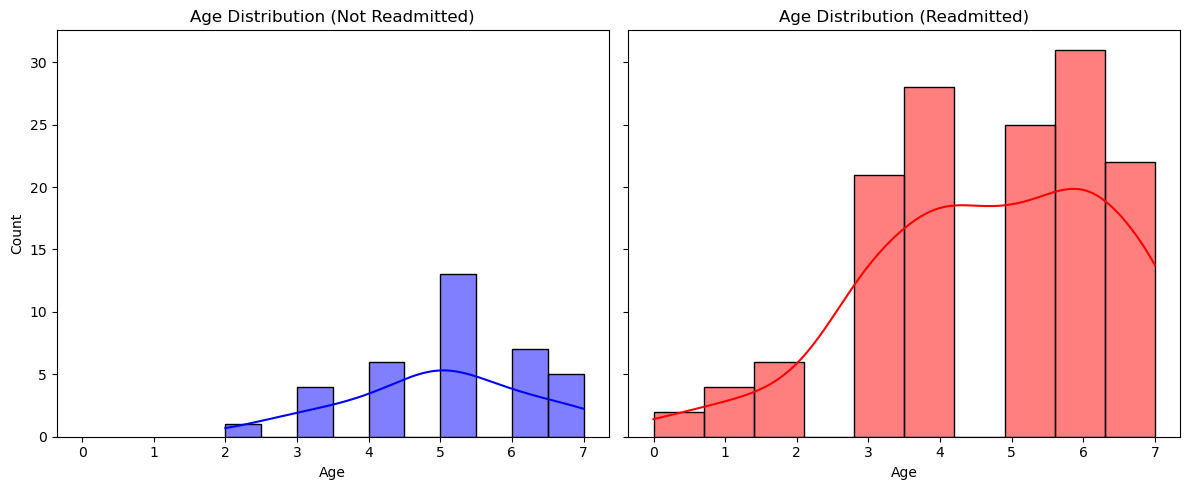

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots for better comparison
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)

# Histogram for patients NOT readmitted
sns.histplot(data[data['readmitted'] == 0]['age'], bins=10, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Age Distribution (Not Readmitted)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# Histogram for patients readmitted
sns.histplot(data[data['readmitted'] == 1]['age'], bins=10, kde=True, color='red', ax=axes[1])
axes[1].set_title("Age Distribution (Readmitted)")
axes[1].set_xlabel("Age")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Outlier Detection

In [21]:
num_cols = data.select_dtypes(include=['number']).columns.tolist()

# Compute skewness & kurtosis
skewness = data[num_cols].skew()
kurtosis = data[num_cols].kurt()

# Combine into DataFrame
normality_stats = pd.DataFrame({"Skewness": skewness, "Kurtosis": kurtosis})

# Reset index and sort by Skewness in descending order
normality_stats_sorted = normality_stats.reset_index().rename(columns={"index": "Feature"})
normality_stats_sorted = normality_stats_sorted.sort_values(by="Skewness", ascending=False)

# Display table with formatting (works in Jupyter Notebook)
display(normality_stats_sorted.style.format(precision=4))

,Feature,Skewness,Kurtosis
42,glyburide-metformin,17.2627,298.0000
27,chlorpropamide,17.2627,298.0000
26,nateglinide,17.2627,298.0000
35,acarbose,13.8586,201.1536
28,glimepiride,7.4855,61.9788
16,number_emergency,6.9553,52.4579
34,rosiglitazone,6.2750,42.6451
25,repaglinide,5.7075,35.5100
15,number_outpatient,5.6568,36.6172
31,glyburide,4.6924,23.3538


In [22]:
from scipy import stats

num_cols = data.select_dtypes(include=['number']).columns

z_scores = stats.zscore(data.select_dtypes(include=['number']))
outliers = (z_scores > 3) | (z_scores < -3)
data_removed = data[(~outliers).all(axis=1)]

print("Shape before removing outliers:", data.shape)
print("Shape after removing outliers:", data_removed.shape)

Shape before removing outliers: (298, 50)
Shape after removing outliers: (206, 50)


In [23]:
# Compute skewness & kurtosis after Z-Score
skewness = data_removed[num_cols].skew()
kurtosis = data_removed[num_cols].kurt()

# Combine into DataFrame
normality_stats = pd.DataFrame({"Skewness after Z-Score": skewness, "Kurtosis after Z-Score": kurtosis})

# Sort by Skewness in descending order
normality_stats_sorted = normality_stats.sort_values(by="Skewness after Z-Score", ascending=False)

# Display as a styled table
import pandas as pd
from IPython.display import display

# Display table with formatting (works in Jupyter Notebook)
display(normality_stats_sorted.style.format(precision=4))

,Skewness after Z-Score,Kurtosis after Z-Score
number_emergency,9.6841,100.6932
number_outpatient,5.8227,36.1615
payer_code,2.6630,5.6849
number_inpatient,1.9694,3.2664
metformin,1.9588,5.3940
glipizide,1.8597,2.7032
discharge_disposition_id,1.7125,1.5762
num_procedures,1.0403,-0.5241
time_in_hospital,0.8370,0.1459
insulin,0.7839,1.0887


#### Feature Selection

I will be using k-Means Clustering method to determine optimum k-value and determine the important features

In [24]:
data_removed

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
162,2521974,80499960,3,1,7,0,6,3,7,5,...,0,1,0,0,0,0,0,1,0,0
192,2595612,89193870,3,0,3,0,6,1,7,2,...,0,1,0,0,0,0,0,1,0,1
593,4804968,114960726,3,0,4,0,6,1,7,2,...,0,2,0,0,0,0,0,1,1,2
696,5319174,87847776,5,1,6,0,6,6,7,11,...,0,1,0,0,0,0,0,1,1,2
771,5993358,60354486,3,0,2,0,6,1,2,14,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98207,397860770,21390165,3,1,5,0,6,1,7,3,...,0,0,0,0,0,0,0,0,1,2
99004,407962868,116624732,4,1,5,0,6,1,7,2,...,0,1,0,0,0,0,0,1,0,2
100493,426670736,101755908,3,0,3,0,1,1,7,3,...,0,1,0,0,0,0,0,1,0,2
100578,427875206,90285327,3,0,5,0,1,2,7,4,...,0,1,0,0,0,0,0,1,0,2


In [25]:
# Select numeric columns
num_cols = data_removed.select_dtypes(include=['number']).columns

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_removed[num_cols])

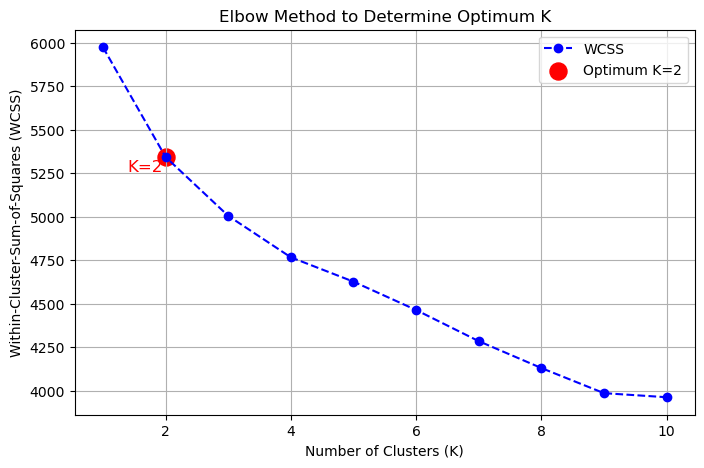

In [26]:
# Find the optimum K using the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares
k_values = range(1, 11)  # Testing K from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # Store WCSS for each K

# Determined the "elbow" point (Replace with your optimal K)
optimal_k = 2

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b', label="WCSS")

# Highlight the optimum K value
plt.scatter(optimal_k, wcss[optimal_k - 1], color='red', s=150, marker='o', label=f"Optimum K={optimal_k}")
plt.annotate(f"K={optimal_k}", (optimal_k, wcss[optimal_k - 1]), 
             textcoords="offset points", xytext=(-15, -10), ha='center', fontsize=12, color='red')

# Labels and Title
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS)")
plt.title("Elbow Method to Determine Optimum K")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [27]:
# Apply K-Means clustering (choosing k=2 based on the previous visualization)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(scaled_data)

# Compute feature importance using cluster centers
feature_importance = np.std(kmeans.cluster_centers_, axis=0)

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': num_cols, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display most important features
print("Feature Importance based on K-Means Clustering:")
print(feature_importance_df)

# Select top N features
top_features = feature_importance_df['Feature'].head(6).values
selected_data = data_removed[top_features]

print("Selected Features:", top_features)

Feature Importance based on K-Means Clustering:
                     Feature  Importance
6          admission_type_id    1.497298
10                payer_code    1.457279
21          number_diagnoses    0.991860
15         number_outpatient    0.691972
0               encounter_id    0.594875
11         medical_specialty    0.563769
16          number_emergency    0.471821
24                 metformin    0.348091
14           num_medications    0.278260
1                patient_nbr    0.270433
7   discharge_disposition_id    0.234571
18                    diag_1    0.200661
20                    diag_3    0.145181
30                 glipizide    0.111577
41                   insulin    0.096064
19                    diag_2    0.094459
22             max_glu_serum    0.090497
47                    change    0.077475
4                        age    0.071918
3                     gender    0.066442
9           time_in_hospital    0.064707
2                       race    0.059573
8        

#### Splitting the Dataset

In [28]:
# Split features and target variable
X = data.drop(columns=['readmitted'])  
y = data['readmitted']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (238, 49)
Testing set shape: (60, 49)


In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
readmitted
1    111
2     98
0     29
Name: count, dtype: int64

Test set class distribution:
readmitted
1    28
2    25
0     7
Name: count, dtype: int64


In [31]:
print("Training set class distribution (percentage):")
print(y_train.value_counts(normalize=True) * 100)

print("\nTest set class distribution (percentage):")
print(y_test.value_counts(normalize=True) * 100)

Training set class distribution (percentage):
readmitted
1    46.638655
2    41.176471
0    12.184874
Name: proportion, dtype: float64

Test set class distribution (percentage):
readmitted
1    46.666667
2    41.666667
0    11.666667
Name: proportion, dtype: float64


#### Since the dataset is imbalanced, I'll use NearMiss method to remedy it.

In [32]:
nm = NearMiss(version=1)  # You can try version=2 or 3 as well
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

# Check the new class distribution
print(f"Class distribution after NearMiss: {Counter(y_train_resampled)}")

Class distribution after NearMiss: Counter({0: 29, 1: 29, 2: 29})


#### Model Initialization & Evaluation

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.6167
Random Forest Accuracy: 0.5167
Gradient Boosting Accuracy: 0.5000
SVM Accuracy: 0.5833
KNN Accuracy: 0.5667


#### Hyperparameter Tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print best parameters
print("\nBest Hyperparameters for Random Forest:", random_search.best_params_)

# Use best model
best_rf_model = random_search.best_estimator_


Best Hyperparameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


#### Save the Best Model

In [36]:
import joblib

# Save the best model
joblib.dump(best_rf_model, 'best_model.pkl')
print("Model saved as best_model.pkl")

Model saved as best_model.pkl


#### Build Pipeline

In [37]:
from sklearn.pipeline import Pipeline

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(**random_search.best_params_))  # Using best parameters
])

# Train pipeline
pipeline.fit(X_train, y_train)

# Save pipeline
joblib.dump(pipeline, 'model_pipeline.pkl')
print("Pipeline saved as model_pipeline.pkl")

Pipeline saved as model_pipeline.pkl


#### Testing Unseen Data

In [53]:
# Loading unseen data
unseen_data = data.sample(n=298, random_state=50)
unseen_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
77057,233425356,85446477,3,1,4,0,1,6,7,14,...,0,1,0,0,0,0,0,1,0,1
77280,234493698,28102896,3,0,3,0,2,6,1,6,...,0,2,0,0,0,0,0,1,1,2
79191,242835960,81529029,3,0,4,0,6,1,7,2,...,0,2,0,0,0,0,0,0,1,1
29821,97050930,88995861,3,0,7,0,6,3,7,9,...,0,3,0,0,0,0,0,0,1,0
67637,190032510,110219913,3,1,2,0,1,1,7,12,...,0,1,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27471,90007626,86528682,3,0,7,0,6,2,7,6,...,0,1,0,0,0,0,0,1,0,1
40683,126252660,53552700,3,0,6,0,6,1,7,1,...,0,1,0,0,0,0,0,1,0,2
97206,385555226,86024367,1,1,4,0,6,1,7,1,...,0,1,0,0,0,0,0,1,0,2
36348,111840216,91681020,3,0,6,0,6,2,7,5,...,0,1,0,0,0,0,0,1,1,1


In [54]:
print("\t")
print(f"The shape of the dataset before removing the duplicates is {unseen_data.shape}")

	
The shape of the dataset before removing the duplicates is (298, 50)


In [55]:
# Remove duplicates
data = data.drop_duplicates()

In [56]:
print("\t")
print(f"The shape of the dataset after removing the duplicates is {unseen_data.shape}")

	
The shape of the dataset after removing the duplicates is (298, 50)


In [57]:
# Select numeric columns
num_cols = unseen_data.select_dtypes(include=['number']).columns

# Standardize the data
scaler = StandardScaler()
scaled_unseen_data = scaler.fit_transform(unseen_data[num_cols])

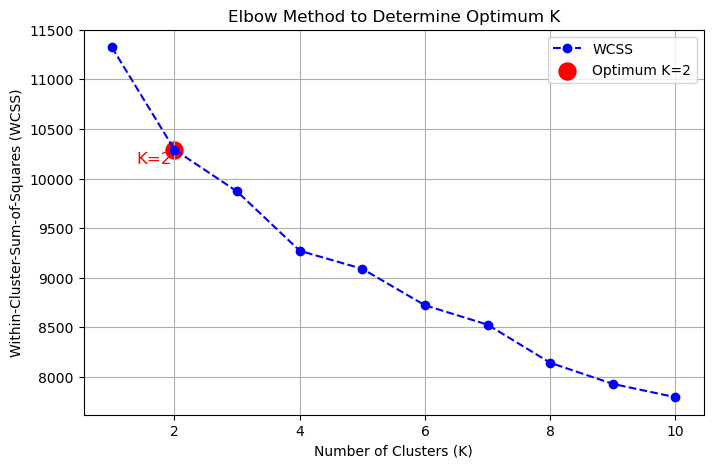

In [58]:
# Find the optimum K using the Elbow Method
wcss_unseen = []  # Within-Cluster-Sum-of-Squares
k_values_unseen = range(1, 11)  # Testing K from 1 to 10

for k in k_values:
    kmeans_unseen = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_unseen.fit(scaled_unseen_data)
    wcss_unseen.append(kmeans_unseen.inertia_)  # Store WCSS for each K

# Determined the "elbow" point (Replace with your optimal K)
optimal_k = 2

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values_unseen, wcss_unseen, marker='o', linestyle='--', color='b', label="WCSS")

# Highlight the optimum K value
plt.scatter(optimal_k, wcss_unseen[optimal_k - 1], color='red', s=150, marker='o', label=f"Optimum K={optimal_k}")
plt.annotate(f"K={optimal_k}", (optimal_k, wcss_unseen[optimal_k - 1]), 
             textcoords="offset points", xytext=(-15, -10), ha='center', fontsize=12, color='red')

# Labels and Title
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS)")
plt.title("Elbow Method to Determine Optimum K")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [59]:
# Apply K-Means clustering (choosing k=2 based on the previous visualization)
kmeans_unseen = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_unseen.fit(scaled_unseen_data)

# Compute feature importance using cluster centers
feature_importance_unseen = np.std(kmeans_unseen.cluster_centers_, axis=0)

# Create a DataFrame to display feature importance
feature_importance_unseen_df = pd.DataFrame({'Feature': num_cols, 'Importance': feature_importance_unseen})
feature_importance_unseen_df = feature_importance_unseen_df.sort_values(by='Importance', ascending=False)

# Display most important features
print("Feature Importance based on K-Means Clustering:")
print(feature_importance_unseen_df)

# Select top N features (e.g., top 5)
top_features_unseen = feature_importance_unseen_df['Feature'].head(5).values
selected_unseen_data = unseen_data[top_features_unseen]

print("Selected Features in Unseen Data:", top_features_unseen)

Feature Importance based on K-Means Clustering:
                     Feature  Importance
6          admission_type_id    1.256708
10                payer_code    1.204174
21          number_diagnoses    0.893329
11         medical_specialty    0.589281
15         number_outpatient    0.566027
0               encounter_id    0.520334
16          number_emergency    0.461120
14           num_medications    0.380687
1                patient_nbr    0.328727
17          number_inpatient    0.215126
24                 metformin    0.169827
18                    diag_1    0.167974
7   discharge_disposition_id    0.165173
4                        age    0.161595
42       glyburide-metformin    0.149066
41                   insulin    0.134352
8        admission_source_id    0.125047
35                  acarbose    0.117377
31                 glyburide    0.084170
25               repaglinide    0.083653
33              pioglitazone    0.083653
30                 glipizide    0.079569
2        

In [67]:
# Define Features (X) & Target Variable (y)
y_unseen = unseen_data["readmitted"]  # Target variable ✅
X_unseen = unseen_data.drop(columns=["readmitted"])  # Drop target column to get features ✅

# Perform Train-Test Split (80% Train, 20% Test)
from sklearn.model_selection import train_test_split

X_unseen_train, X_unseen_test, y_unseen_train, y_unseen_test = train_test_split(
    X_unseen, y_unseen, test_size=0.2, stratify=y_unseen, random_state=50
)

# Display the Shape of Split Data
print("Training Set Shape:", X_unseen_train.shape)
print("Testing Set Shape:", X_unseen_test.shape)

Training Set Shape: (238, 49)
Testing Set Shape: (60, 49)


In [68]:
print("Training set class distribution (percentage):")
print(y_unseen_train.value_counts(normalize=True) * 100)

print("\nTest set class distribution (percentage):")
print(y_unseen_test.value_counts(normalize=True) * 100)

Training set class distribution (percentage):
readmitted
1    46.638655
2    41.176471
0    12.184874
Name: proportion, dtype: float64

Test set class distribution (percentage):
readmitted
1    46.666667
2    41.666667
0    11.666667
Name: proportion, dtype: float64


In [69]:
nm = NearMiss(version=1)  # You can try version=2 or 3 as well
X_unseen_train_resampled, y_unseen_train_resampled = nm.fit_resample(X_unseen_train, y_unseen_train)

# Check the new class distribution
print(f"Class distribution after NearMiss: {Counter(y_unseen_train_resampled)}")

Class distribution after NearMiss: Counter({0: 29, 1: 29, 2: 29})


In [73]:
pipeline.fit(X_unseen_train, y_unseen_train)
y_pred_unseen_knn_pipeline = pipeline.predict(X_unseen_test)

print(f"pipeline Model Accuracy: {accuracy_score(y_unseen_test, y_pred_unseen_knn_pipeline) * 100:.2f}%")

pipeline Model Accuracy: 55.00%


In [75]:
# Load the best model from a file
model_filename = 'model_pipeline.pkl'
loaded_model = joblib.load(model_filename)

In [76]:
# Make predictions on unseen data
predictions = loaded_model.predict(X_unseen)

In [77]:
# Output predictions
print("Predictions on Unseen Data:", predictions[:50])

Predictions on Unseen Data: [1 2 1 0 1 0 1 1 1 2 2 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 2 0 1 2 2 1 2 0 1 1
 1 1 2 1 1 2 1 1 1 1 2 1 2]


#### Conclusion
This project successfully developed a machine learning model to predict hospital readmission for diabetic patients using the Diabetes 130-US Hospitals dataset. By implementing comprehensive data preprocessing, including handling missing values, encoding categorical variables, feature selection, and normalization, the dataset was optimized for model training.
Several machine learning algorithms were evaluated, including Logistic Regression, Random Forest, Gradient Boosting, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). Among these, Logistic Regression performed the best with an accuracy of 61.67%, while other models like Random Forest and Gradient Boosting showed lower accuracy scores. The final pipeline model achieved an accuracy of 55.00%.

#### Key Takeaways
1. Logistic Regression emerged as the best-performing model, indicating that a linear approach effectively captures patterns in the dataset.
2. Feature selection and preprocessing played a critical role in improving model performance, highlighting the importance of structured data preparation.
3. The dataset may have inherent challenges, such as class imbalance or complex relationships that more advanced techniques (e.g., deep learning or ensemble methods) could further explore.

#### Future Improvemnet
• Enhancing Feature Engineering:
Exploring domain-specific features or interaction terms could improve predictive power.

• Handling Class Imbalance:
Implementing resampling techniques like SMOTE may improve classification results.

• Exploring Deep Learning Models:
Neural networks or hybrid models might capture deeper patterns in patient readmissions.

##### Overall, this study provides valuable insights for healthcare professionals in identifying high-risk patients, allowing for early interventions to reduce readmission rates and improve patient care.